In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import librosa
from tqdm.notebook import tqdm
from IPython.display import Audio
from pandas.api.types import is_numeric_dtype

import sys
sys.path.append('../')
import default_style

TS_DATASET_FOLDER = os.path.join("..", "dataset")
TS_PREPROC_FOLDER = os.path.join(TS_DATASET_FOLDER, "preprocessed_traces")
DF_PREPROC_FILE = os.path.join(TS_PREPROC_FOLDER, "preproc_ts.df")

INTERESTING_TRACES = ["syllables_fourier", "std_phon_trace"]
INTERESTING_TRACES += [f"syllables_{i}_phon_trace" for i in range(7)]
## Save folder for long-run estimators
ESTIMATORS_FOLDER = os.path.join("..", "estimators")

### Import

In [20]:
traces = dict()
for int_tr in INTERESTING_TRACES:
    traces[int_tr] = np.load(os.path.join(TS_PREPROC_FOLDER, f"{int_tr}.npy"), allow_pickle=True)
print(traces["syllables_fourier"].shape)
traces["syll_labels"] = np.repeat(np.arange(7), len(traces["syllables_fourier"])//7)
print(traces["syll_labels"].shape)

(17164, 16)
(17164,)


## Base stats

In [23]:
X = traces["syllables_0_phon_trace"]
X[np.isnan(X)] = 0.0
plt.plot(np.mean())

## Embedding

In [6]:
from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
M = 5_000
who = np.arange(len(traces["syllables_fourier"]))#np.random.randint(len(traces["syllables_fourier"]), size=M)
reducer = UMAP(n_components=2)
embedding = reducer.fit_transform(traces["syllables_fourier"][who])

/home/djanloo/.local/share/virtualenvs/DM2-PeqFRmfa/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/djanloo/.local/share/virtualenvs/DM2-PeqFRmfa/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/djanloo/.local/share/virtualen

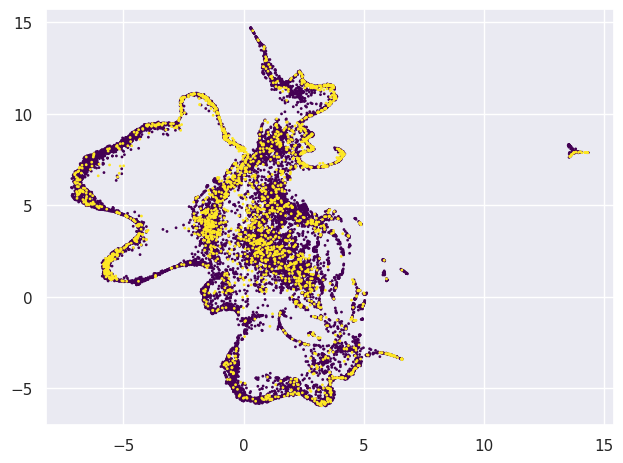

In [16]:
plt.scatter(*embedding.T, s=1, c=(traces["syll_labels"][who]==6), cmap="viridis")
# plt.xlim(-10, 10)
# plt.ylim(-10, 10)